In [ ]:
# MODEL USED FOR SKIN CANCER PREDICTION
# 1 - ANN = 70 % ACC
#
# NOVELTY ===
# 2 - CNN = 76% ACC
# 3 - MOBILNET NEW MODEL
# IN MOBILENET = CODE run [tuning reqd]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import math


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
#Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from glob import glob

from PIL import Image
from tensorflow.keras.utils import to_categorical
import keras
import tensorflow as tf

In [ ]:
from google.colab import drive
import os
import pandas as pd
from glob import glob

# # Mount Google Drive
# drive.mount('/content/drive')

# Set the base path for your dataset
base_path = '/content/drive/MyDrive/2 lab Nit mca/4th sem/FULL_HAM_DATASET'

# Merging images from both folders into one dictionary
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for folder in ['HAM10000_images_part_1', 'HAM10000_images_part_2']
                     for x in glob(os.path.join(base_path, folder, '*.jpg'))}

# This dictionary is useful for displaying more human-friendly labels later on
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Load the metadata CSV file
metadata_path = os.path.join(base_path, 'HAM10000_metadata.csv')
meta_data_skin_cn = pd.read_csv(metadata_path)

# Creating New Columns for better readability
meta_data_skin_cn['image_path'] = meta_data_skin_cn['image_id'].map(imageid_path_dict.get)
meta_data_skin_cn['cell_type'] = meta_data_skin_cn['dx'].map(lesion_type_dict.get)
meta_data_skin_cn['cell_type_idx'] = pd.Categorical(meta_data_skin_cn['cell_type']).codes

# Display the DataFrame
meta_data_skin_cn.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2


In [ ]:
# Display the DataFrame
meta_data_skin_cn.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2


In [ ]:
# # Lesion types: Classes for each image.
# lesionTypes = {
#     'nv': 'Melanocytic nevi',
#     'mel': 'Melanoma',
#     'bkl': 'Benign keratosis-like lesions ',
#     'bcc': 'Basal cell carcinoma',
#     'akiec': 'Actinic keratoses',
#     'vasc': 'Vascular lesions',
#     'df': 'Dermatofibroma'
# }

In [ ]:
meta_data_skin_cn.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'image_path', 'cell_type', 'cell_type_idx'],
      dtype='object')

In [ ]:
meta_data_skin_cn.shape

(10015, 10)

In [ ]:
# Check missing values in dataset:
meta_data_skin_cn.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
image_path        0
cell_type         0
cell_type_idx     0
dtype: int64

In [ ]:
# Replace null values in age feature with mean:
meta_data_skin_cn['age'].fillna(int(meta_data_skin_cn['age'].mean()), inplace= True)

In [ ]:
# Check missing values in dataset:
meta_data_skin_cn.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
image_path       0
cell_type        0
cell_type_idx    0
dtype: int64

Add Images to Dataset:

In [ ]:
# Drop rows where 'image_path' is None
meta_data_skin_cn = meta_data_skin_cn[meta_data_skin_cn['image_path'].notnull()]  # This keeps only rows where 'image_path' is not None

meta_data_skin_cn

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Actinic keratoses,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Actinic keratoses,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Actinic keratoses,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Actinic keratoses,0


In [ ]:
# Check missing values in dataset:
meta_data_skin_cn.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
image_path       0
cell_type        0
cell_type_idx    0
dtype: int64

In [ ]:
# Import the Image module
from PIL import Image

# Size of an image in original dataset:
np.asarray(Image.open(meta_data_skin_cn['image_path'][139])).shape

(450, 600, 3)

In [ ]:
# Resize all of images in size (150,200,3):
meta_data_skin_cn['image'] = meta_data_skin_cn['image_path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

In [ ]:
# # Size of an image - resized 125,100
# np.asarray(Image.open(meta_data_skin_cn['image_path'][1])).shape

In [ ]:
# Check dataset:
meta_data_skin_cn.tail()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,cell_type,cell_type_idx,image
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Actinic keratoses,0,"[[[143, 125, 134], [140, 122, 131], [140, 122,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Actinic keratoses,0,"[[[5, 6, 3], [6, 7, 4], [7, 8, 5], [8, 8, 6], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Actinic keratoses,0,"[[[109, 99, 102], [122, 111, 112], [132, 121, ..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Actinic keratoses,0,"[[[157, 121, 143], [160, 125, 145], [155, 114,..."
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Melanoma,5,"[[[179, 147, 132], [177, 146, 137], [177, 141,..."


In [ ]:
# Check the size of all images in dataset:
meta_data_skin_cn['image'].map(lambda x: x.shape).value_counts()

image
(100, 125, 3)    10015
Name: count, dtype: int64

In [ ]:
# IMG - IS RESIZED .... 100 * 125 * 3

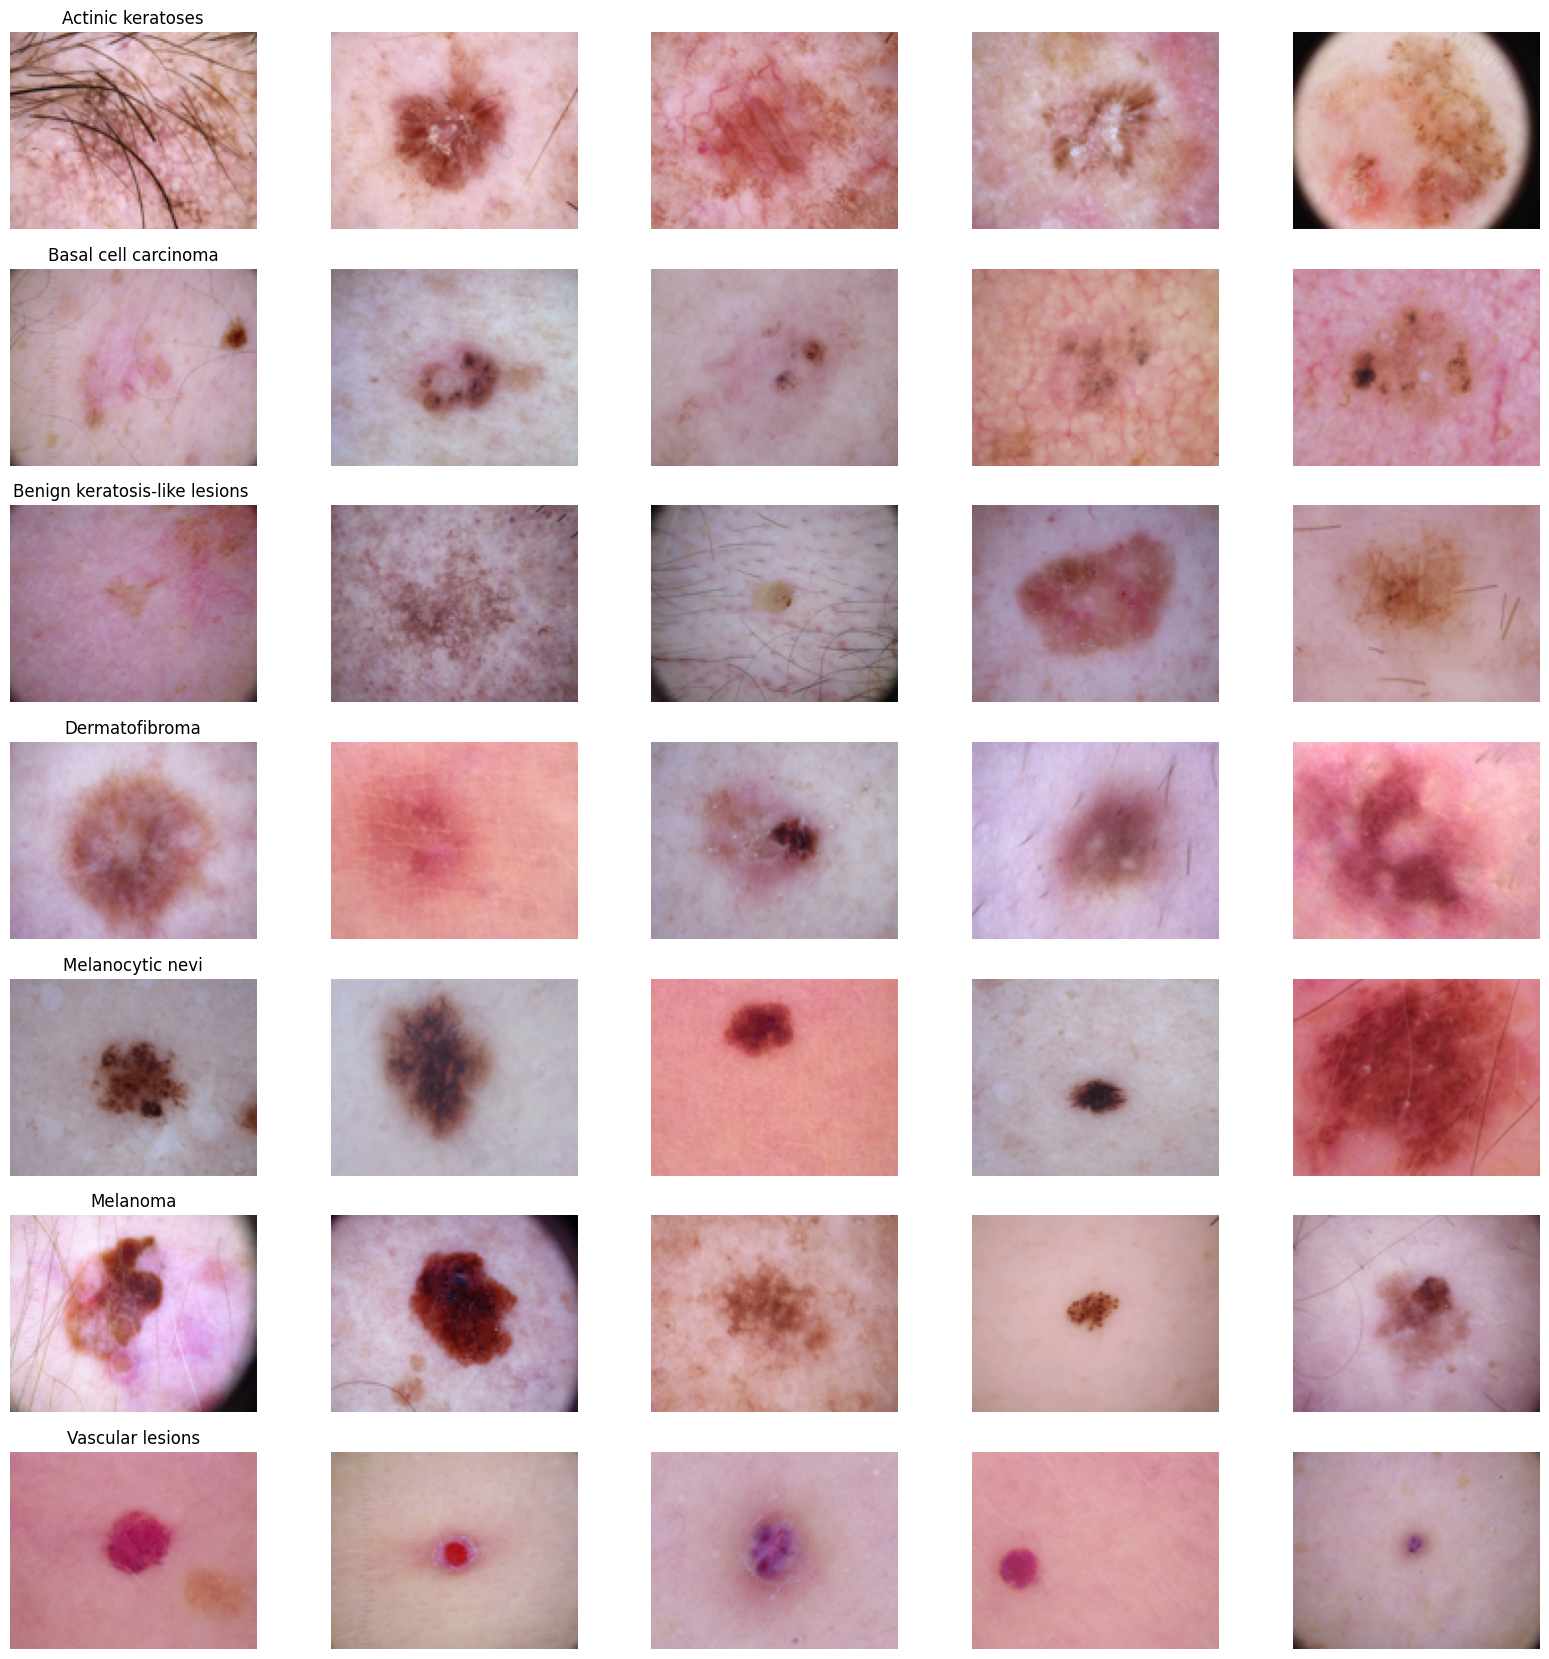

In [ ]:
# Show some images from the dataset:
numCols = 5
numRows = 7
# subplot of 7 rows and 5 columns images:
fig, mAxs = plt.subplots(numRows, numCols, figsize = (4*numCols, 3*numRows))
for nAxs, (className, rowTypes) in zip(mAxs,
                                         meta_data_skin_cn.sort_values(['cell_type']).groupby('cell_type')):
    nAxs[0].set_title(className)
    for c_ax, (_, cRow) in zip(nAxs, rowTypes.sample(numCols, random_state=5420).iterrows()):
        c_ax.imshow(cRow['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

Exploratory Data Analysis - EDA

In [ ]:
# Remove outliers from data set:
# Remove age == 0 from dataset:
meta_data_skin_cn= meta_data_skin_cn[meta_data_skin_cn['age'] != 0]
# Remove unkown sex from data set:
meta_data_skin_cn= meta_data_skin_cn[meta_data_skin_cn['sex'] != 'unknown']

<Axes: title={'center': 'Gender'}, xlabel='sex', ylabel='Count'>

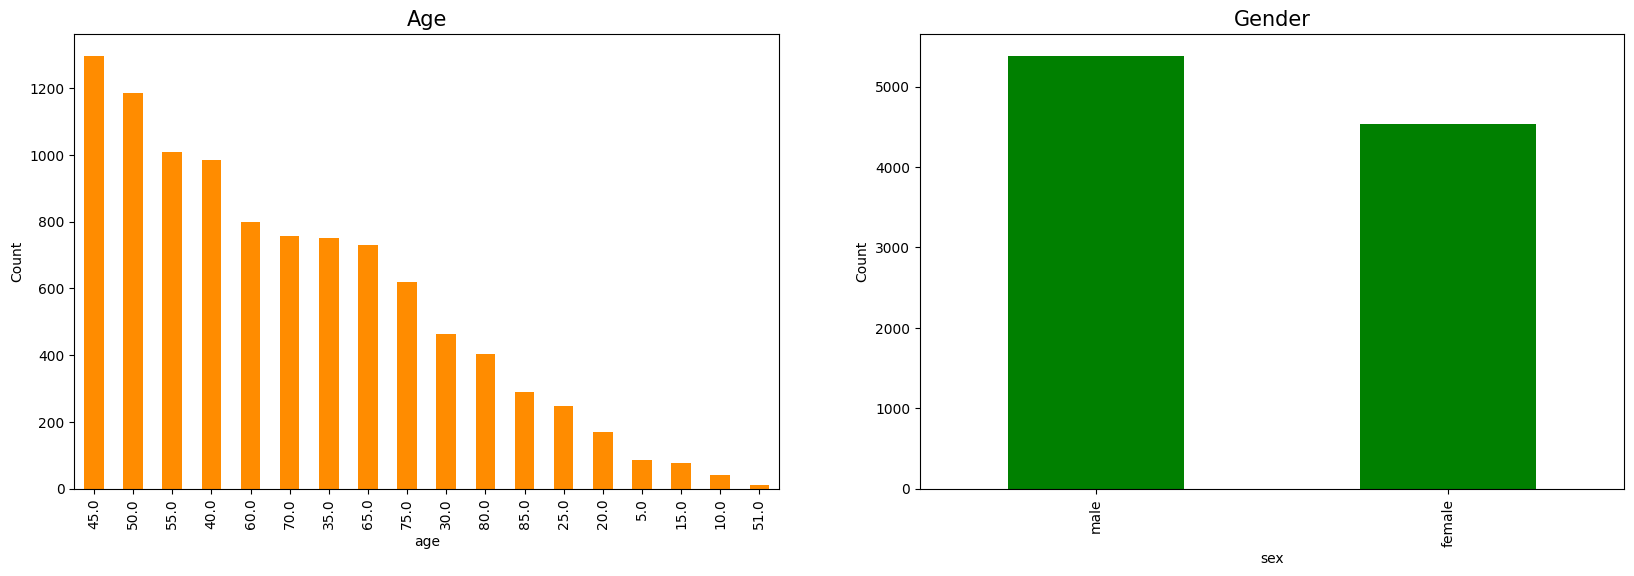

In [ ]:
# Plot some features:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
# Age feature:
plt.subplot(2,2,1)
plt.title("Age",fontsize=15)
plt.ylabel("Count")
meta_data_skin_cn['age'].value_counts().plot.bar(color = ['darkorange'])

# Gender feature:
plt.subplot(2,2,2)
plt.title("Gender",fontsize=15)
plt.ylabel("Count")
meta_data_skin_cn['sex'].value_counts().plot.bar(color = ['green'])



<Axes: title={'center': 'cell_type'}, xlabel='cell_type', ylabel='Count'>

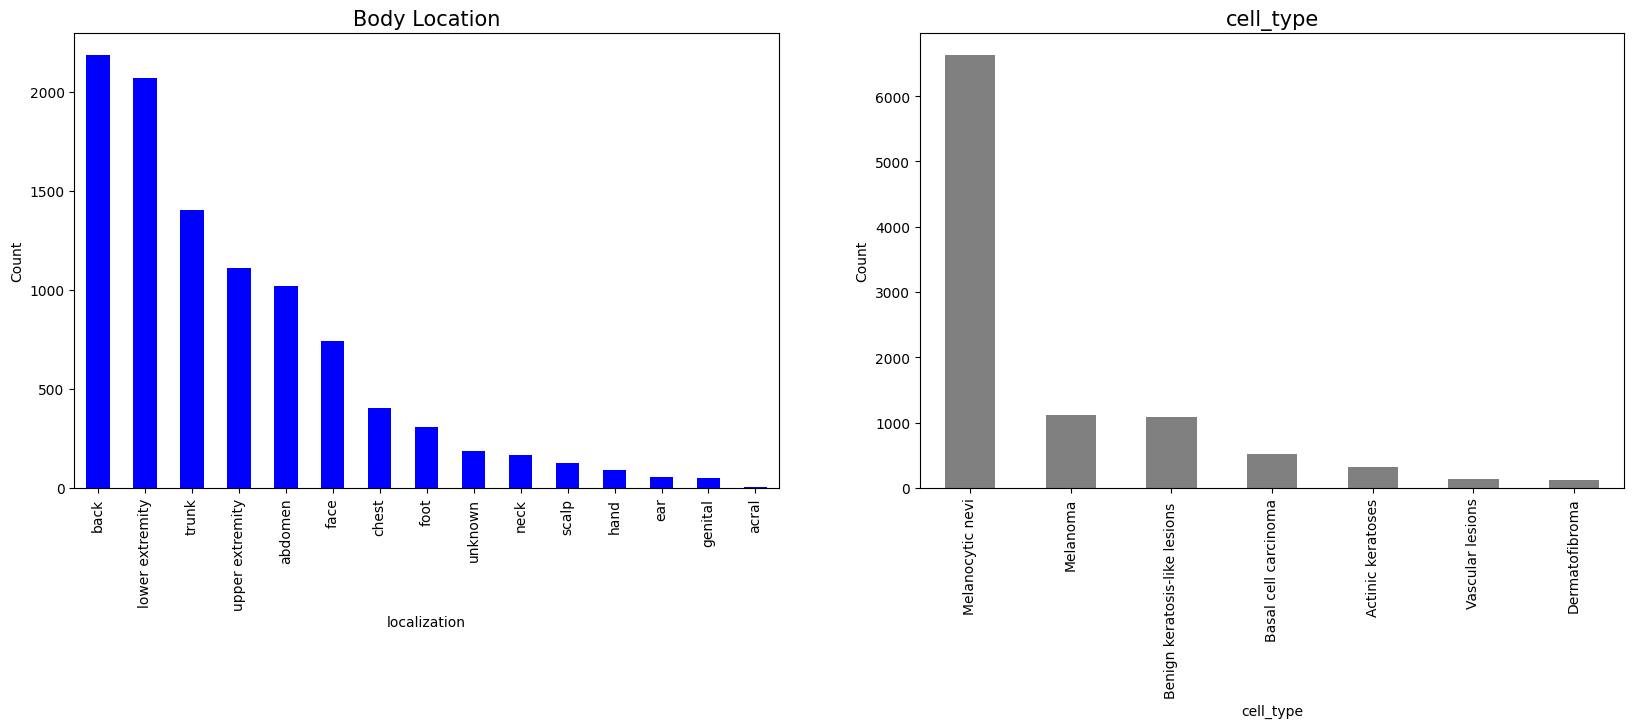

In [ ]:
# Plot some features:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)

# Localization feature:
plt.subplot(2,2,1)
plt.title("Body Location",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
meta_data_skin_cn['localization'].value_counts().plot.bar(color = 'blue')

# Lesion type: / cell_type
plt.subplot(2,2,2)
plt.title("cell_type",fontsize=15)
plt.ylabel("Count")
meta_data_skin_cn['cell_type'].value_counts().plot.bar(color = ['grey'])

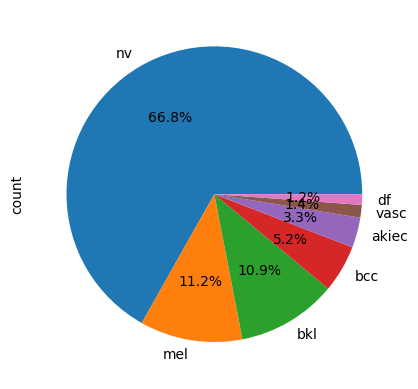

In [ ]:
# Pie chart to check proportion of each lesion type in dataset:
meta_data_skin_cn['dx'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

<Axes: title={'center': 'Bodey Location VS Gender'}, xlabel='count', ylabel='localization'>

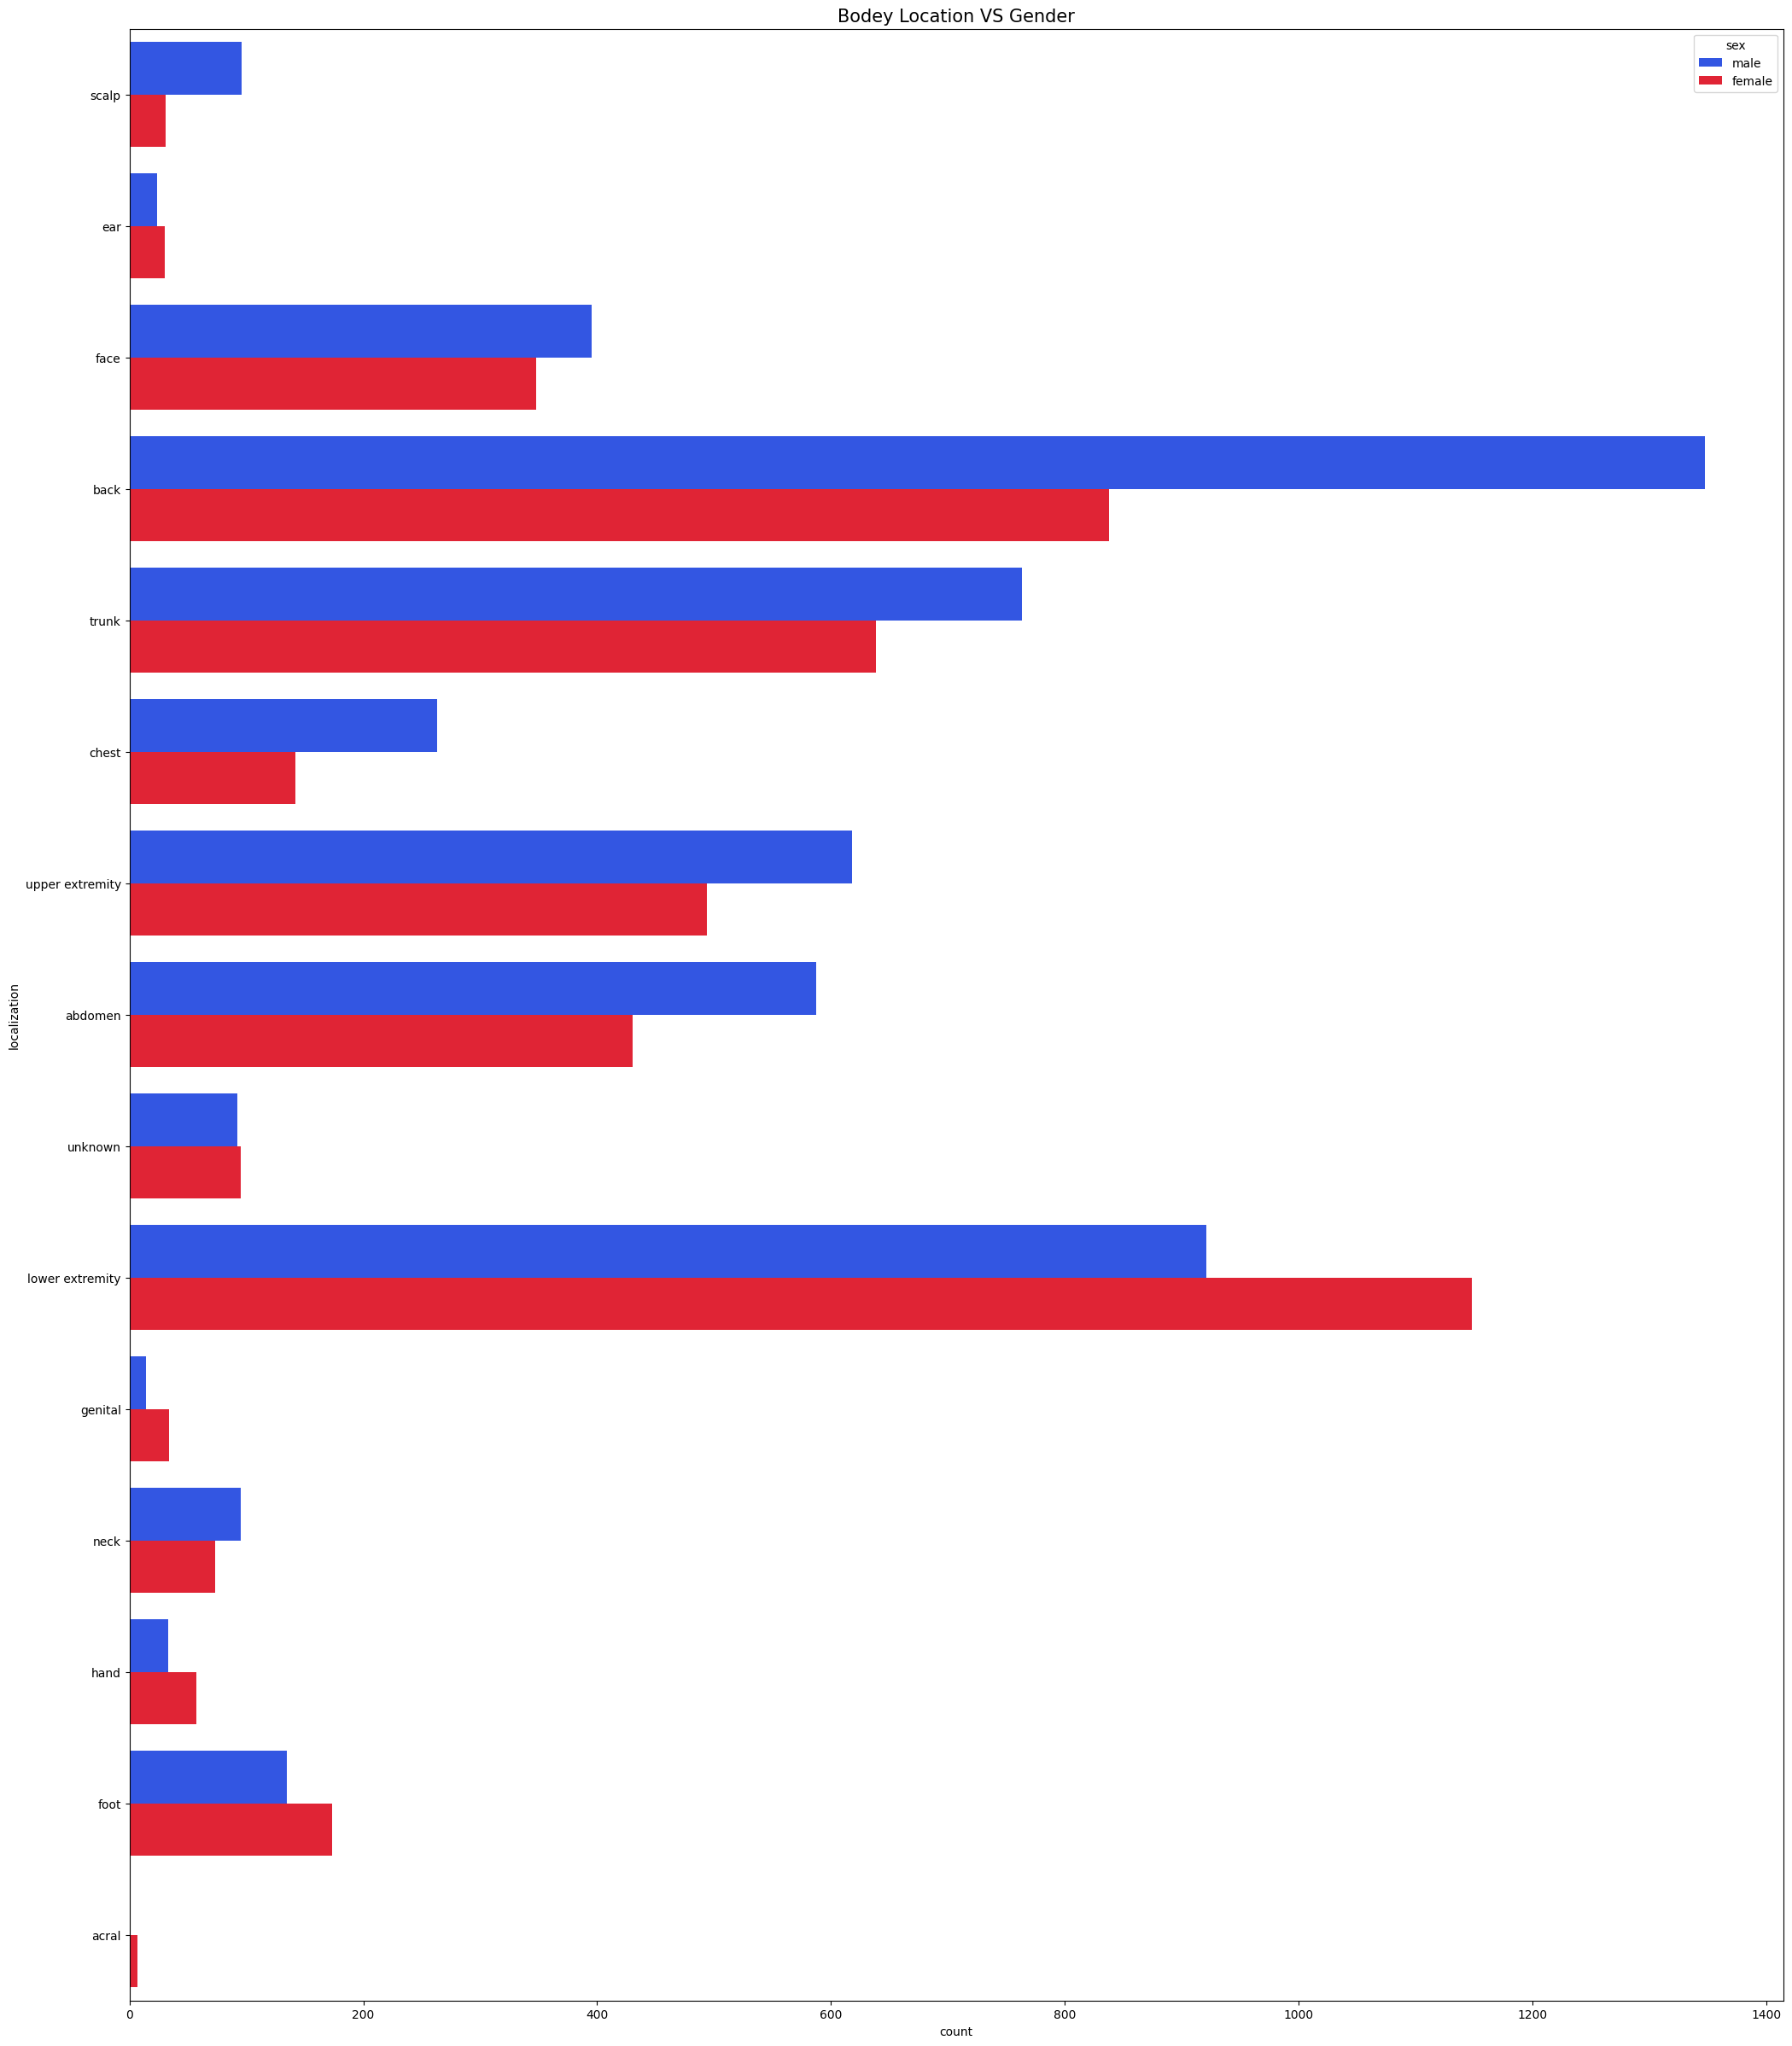

In [ ]:
# Check lesion types based on sex:
plt.figure(figsize = (25,30))
plt.title('Bodey Location VS Gender', fontsize = 15)
sns.countplot(y = 'localization', hue = 'sex', data = meta_data_skin_cn, palette = ['#1644FF',"#FF051B"])

In [ ]:
# Skin cancer is the most common human malignancy, is primarily diagnosed visually
# 1 - initial clinical screening and
# 2 - followed potentially by dermoscopic analysis,
# 3 - a biopsy and histopathological examination

In [ ]:
# Automated classification of skin lesions using images

# Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size
# and lack of diversity of available dataset of dermatoscopic images

In [ ]:
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T

# This the HAM10000 ("Human Against Machine with 10000 training images") dataset.
# It consists of 10015 dermatoscopicimages which are released as a training set
# for academic machine learning purposes

# images are stored in two files ---
# HAM10000_images_part1.zip (5000 JPEG files)
# HAM10000_images_part2.zip (5015 JPEG files)

# ISIC2018_Task3_Test_GroundTruth.csv
# The test-set images are available herein as ISIC2018_Task3_Test_Images.zip (1511 images),
#  the ground-truth in the same format as the HAM10000 data (public since 2023) is available as ISIC2018_Task3_Test_GroundTruth.csv

In [ ]:
# It has 7 different classes of skin cancer which are listed below :
# 1. Melanocytic nevi
# 2. Melanoma
# 3. Benign keratosis-like lesions
# 4. Basal cell carcinoma
# 5. Actinic keratoses
# 6. Vascular lesions
# 7. Dermatofibroma

In [ ]:
 # we will try to detect 7 different classes of skin cancer
 # using Convolution Neural Network with keras tensorflow in backend

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools


In [ ]:

import keras
#from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
#import itertools


In [ ]:
# from keras.layers.normalization import BatchNormalization
# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

# from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau
# from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
# ANN
# A simple neural network is implemented first with the following layers to get patterns in images.
# The accuracy achieved is approximately 69 percent.

In [ ]:
df = meta_data_skin_cn.copy()
df.head(2)

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,2,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9921 entries, 0 to 10014
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      9921 non-null   object 
 1   image_id       9921 non-null   object 
 2   dx             9921 non-null   object 
 3   dx_type        9921 non-null   object 
 4   age            9921 non-null   float64
 5   sex            9921 non-null   object 
 6   localization   9921 non-null   object 
 7   image_path     9921 non-null   object 
 8   cell_type      9921 non-null   object 
 9   cell_type_idx  9921 non-null   int8   
 10  image          9921 non-null   object 
dtypes: float64(1), int8(1), object(9)
memory usage: 862.3+ KB


In [ ]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [ ]:
features.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,cell_type,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/2 lab Nit mca/4th sem/F...,Benign keratosis-like lesions,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


In [ ]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Actinic keratoses', b'Vascular lesions',
       b'Benign keratosis-like lesions ', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7440,), dtype=int32, numpy=array([0, 1, 2, ..., 1, 0, 0], dtype=int32)>)

In [ ]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
from keras.utils import to_categorical

In [ ]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

In [ ]:
print(x_train.shape)  # Original shape of x_train
print(x_test.shape)   # Original shape of x_test
print(x_validate.shape)

(6696, 100, 125, 3)
(2481, 100, 125, 3)
(744, 100, 125, 3)


In [ ]:
x_train = x_train.reshape(6696, 100 * 125 * 3)
x_test = x_test.reshape(2481, 100 * 125 * 3)
x_validate = x_validate.reshape(744, 100 * 125 * 3)

print(x_train.shape)  # New shape of x_train
print(x_test.shape)   # New shape of x_test
print(x_validate.shape)  # New shape of x_validate

(6696, 37500)
(2481, 37500)
(744, 37500)


In [ ]:
# define the keras model
model = Sequential()

model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 37500))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                    beta_1 = 0.9,
                                    beta_2 = 0.999,
                                    epsilon = 1e-8)

# compile the keras model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# fit the keras model on the dataset
history = model.fit(x_train, y_train, batch_size = 10, epochs = 20)

accuracy = model.evaluate(x_test, y_test, verbose=1)[1]
print("Test: accuracy = ",accuracy*100,"%")

Epoch 1/20
670/670 [==============================] - 7s 6ms/step - loss: 0.9829 - accuracy: 0.6670
Epoch 2/20
670/670 [==============================] - 3s 4ms/step - loss: 0.9068 - accuracy: 0.6819
Epoch 3/20
670/670 [==============================] - 3s 4ms/step - loss: 0.8642 - accuracy: 0.6950
Epoch 4/20
670/670 [==============================] - 3s 4ms/step - loss: 0.8354 - accuracy: 0.7013
Epoch 5/20
670/670 [==============================] - 4s 5ms/step - loss: 0.8041 - accuracy: 0.7161
Epoch 6/20
670/670 [==============================] - 3s 5ms/step - loss: 0.7674 - accuracy: 0.7243
Epoch 7/20
670/670 [==============================] - 3s 4ms/step - loss: 0.7456 - accuracy: 0.7258
Epoch 8/20
670/670 [==============================] - 3s 4ms/step - loss: 0.7183 - accuracy: 0.7416
Epoch 9/20
670/670 [==============================] - 3s 4ms/step - loss: 0.6843 - accuracy: 0.7482
Epoch 10/20
670/670 [==============================] - 4s 5ms/step - loss: 0.6509 - accuracy: 0.7633

In [ ]:
# ANN ABOVE ..................

In [ ]:
!pip install keras

In [ ]:
!pip install keras-vis

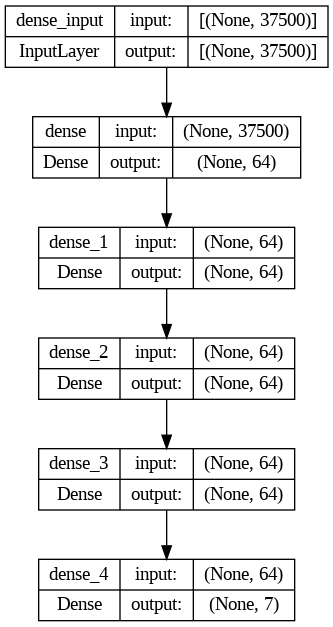

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# ANN - COMPLETED ************************************************
# ****************************************************************

In [ ]:
# CNN --------------------------------------------------------------------------


In [ ]:
# CNN
# CNN is ideal for image classification. It is better since CNN has features parameter sharing and dimensionality reduction. Because of parameter sharing in CNN, the number of parameters is reduced thus the computations get decreased.

# Applied Data augmentation using ImageDatagenerator before model training
# Since the data is less, we apply data augmentation using ImageDataGenerator.

# ImageDataGenerator generates augmentation of images in real-time while the model is still training. One can apply any random transformations on each training image as it is passed to the model.

# The CNN model is a repeated network of the following layers:
# Convolutional
# Pooling
# Dropout
# Flatten
# Dense
# Optimizer: Adam

# Activation function used: Softmax

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the CNN model
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*3 -> Flatten -> Dense*2 -> Dropout -> Out
input_shape = (100, 125, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.16))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same'))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 125, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 125, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 62, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 62, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 62, 32)        9248      
                                                      

In [ ]:
from keras.optimizers import Adam

# Define the optimizer
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)


In [ ]:
from keras.optimizers import Adam

# Define the optimizer
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, amsgrad=False)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [ ]:
x_train

array([[[[ 0.99407537, -0.76945136, -0.29631004],
         [ 0.95106252, -0.87698347, -0.31781646],
         [ 0.99407537, -0.85547705, -0.31781646],
         ...,
         [ 0.77901113, -1.09204771, -0.29631004],
         [ 0.80051756, -1.04903486, -0.27480362],
         [ 0.80051756, -1.02752844, -0.29631004]],

        [[ 1.01558179, -0.8124642 , -0.29631004],
         [ 1.01558179, -0.83397063, -0.29631004],
         [ 1.03708821, -0.76945136, -0.27480362],
         ...,
         [ 0.82202398, -0.96300917, -0.23179077],
         [ 0.82202398, -0.91999632, -0.23179077],
         [ 0.80051756, -1.02752844, -0.31781646]],

        [[ 0.99407537, -0.8124642 , -0.29631004],
         [ 0.99407537, -0.8124642 , -0.27480362],
         [ 1.03708821, -0.85547705, -0.31781646],
         ...,
         [ 0.8435304 , -0.94150274, -0.27480362],
         [ 0.75750471, -0.94150274, -0.31781646],
         [ 0.71449186, -1.02752844, -0.36082931]],

        ...,

        [[ 0.60695974, -1.09204771, -0

In [ ]:
# Fit the model
epochs = 20
batch_size = 4
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

from tensorflow.keras.metrics import Recall
from sklearn.metrics import classification_report,confusion_matrix

Epoch 1/20


<ipython-input-64-6982841154f5>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


1506/1506 [==============================] - 36s 20ms/step - loss: 1.0415 - accuracy: 0.6621 - val_loss: 0.9680 - val_accuracy: 0.6507 - lr: 1.0000e-04
Epoch 2/20
1506/1506 [==============================] - 28s 18ms/step - loss: 0.9167 - accuracy: 0.6702 - val_loss: 0.9142 - val_accuracy: 0.6731 - lr: 1.0000e-04
Epoch 3/20
1506/1506 [==============================] - 27s 18ms/step - loss: 0.8665 - accuracy: 0.6823 - val_loss: 0.9036 - val_accuracy: 0.6866 - lr: 1.0000e-04
Epoch 4/20
1506/1506 [==============================] - 28s 18ms/step - loss: 0.8184 - accuracy: 0.7001 - val_loss: 0.8473 - val_accuracy: 0.6910 - lr: 1.0000e-04
Epoch 5/20
1506/1506 [==============================] - 30s 20ms/step - loss: 0.8031 - accuracy: 0.7099 - val_loss: 0.8383 - val_accuracy: 0.7030 - lr: 1.0000e-04
Epoch 6/20
1506/1506 [==============================] - 28s 19ms/step - loss: 0.7794 - accuracy: 0.7180 - val_loss: 0.8116 - val_accuracy: 0.7030 - lr: 1.0000e-04
Epoch 7/20
1506/1506 [===========

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow


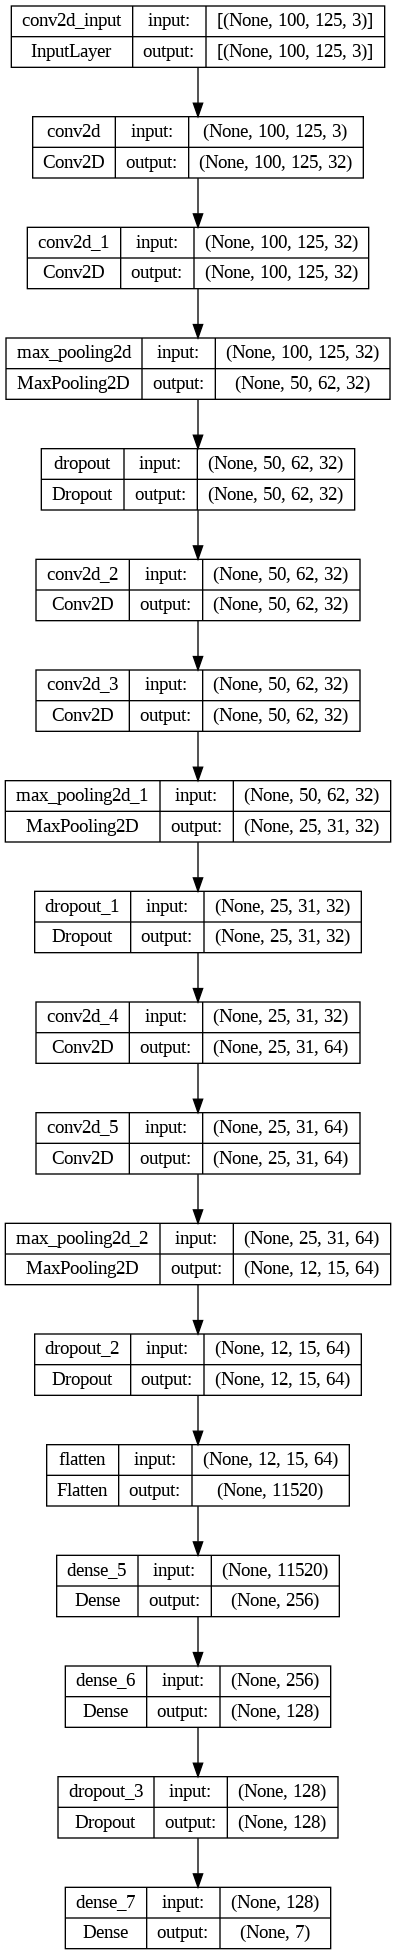

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# CNN ---

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

21/21 [==============================] - 0s 8ms/step - loss: 0.7009 - accuracy: 0.7522
Validation: accuracy = 0.752239  ;  loss_v = 0.700942
Test: accuracy = 0.766626  ;  loss = 0.639982


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 0s 6ms/step


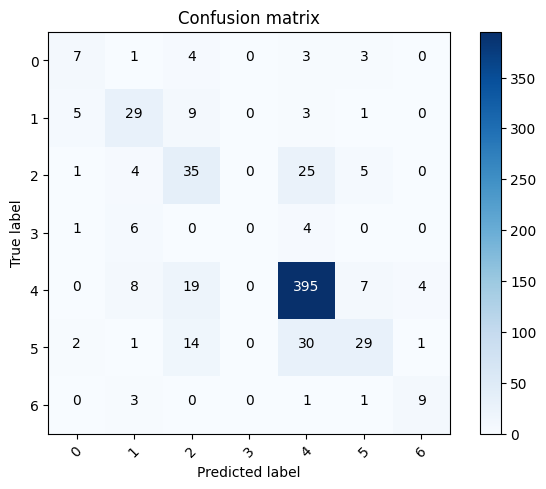

In [ ]:
import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_validate)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

In [ ]:
# validation dataset

78/78 [==============================] - 1s 9ms/step


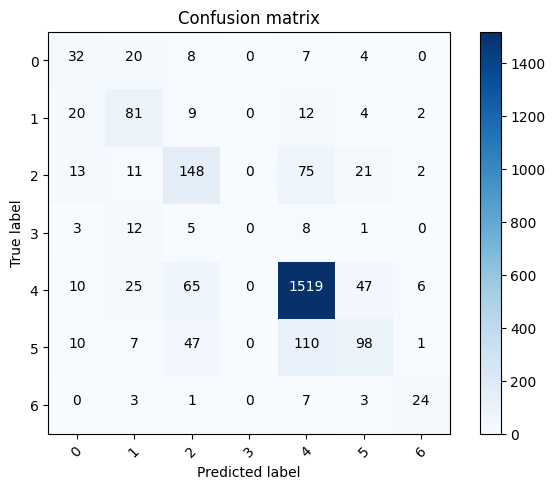

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

Text(0, 0.5, 'Fraction classified incorrectly')

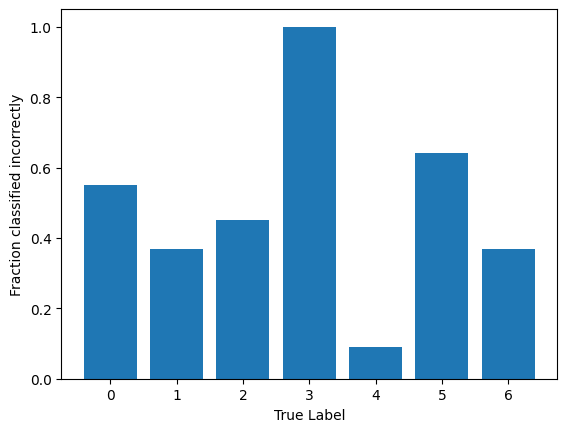

In [ ]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

In [ ]:
# ************************* mobile net   ************************
# **************************************************************************************************

In [ ]:
# Tranfer Learning
# Due to lack of dataset, pretrained model of MobileNet is used.
# Why MobileNet?
# MobileNet significantly reduces the number of parameters when compared to the network with
# regular convolutions with the same depth in the nets. This results in lightweight deep neural networks.

# The 2 layers in addition to the ones used for CNN are: Batch Normalization Zero Padding

In [ ]:
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((450,600))))

In [ ]:
# features=df.drop(columns=['cell_type_idx'],axis=1)
# target=df['cell_type_idx']

In [ ]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Actinic keratoses', b'Vascular lesions',
       b'Benign keratosis-like lesions ', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7440,), dtype=int32, numpy=array([0, 1, 2, ..., 1, 0, 0], dtype=int32)>)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Vascular lesions', b'Benign keratosis-like lesions ',
       b'Actinic keratoses', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7511,), dtype=int32, numpy=array([0, 1, 0, ..., 1, 0, 0], dtype=int32)>)

In [ ]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
print(x_train.shape)  # Original shape of x_train
print(x_test.shape)   # Original shape of x_test
print(x_validate.shape)

(7440, 100, 125, 3)
(2481, 100, 125, 3)
(670, 100, 125, 3)


In [ ]:
total_elements_x_train = x_train.size  # Get total number of elements
total_elements_x_train

279000000

In [ ]:
total_elements_x_test = x_test.size  # Get total number of elements
total_elements_x_test

93037500

In [ ]:
new_shape = (total_elements_x_train // (125 * 100 * 3), 125 * 100 * 3)  # Find compatible shape
new_shape

(7440, 37500)

In [ ]:
new_shape_test = (total_elements_x_test// (125 * 100 * 3), 125 * 100 * 3)  # Find compatible shape
new_shape_test

(2481, 37500)

In [ ]:
# # Calculate the correct reshape size
# correct_shape_x_train = (225000 // (125 * 100 * 3), 125 * 100 * 3)  # (6, 37500)
# print("Correct shape for x_train:", correct_shape_x_train)

# # Validate the reshape
# expected_elements_x_train = correct_shape_x_train[0] * correct_shape_x_train[1]
# if expected_elements_x_train == 225000:
#     x_train = x_train.reshape(correct_shape_x_train)
# else:
#     raise ValueError("Incompatible reshape size for x_train")


In [ ]:
import numpy as np

# Step 1: Simulate x_train with known total elements (in this case, let's simulate with 562500 elements)
x_train = np.random.rand(562500)  # Original x_train array

# Step 2: Calculate the correct reshape size for x_train based on the desired shape (125 * 100 * 3)
correct_shape_x_train = (x_train.size // (125 * 100 * 3), 125 * 100 * 3)  # Calculate correct shape
print("Calculated correct shape for x_train:", correct_shape_x_train)

# Step 3: Validate if reshaping is possible with the calculated shape
expected_elements_x_train = correct_shape_x_train[0] * correct_shape_x_train[1]

if expected_elements_x_train == x_train.size:
    # Reshape if the calculated shape matches the total elements
    x_train_reshaped = x_train.reshape(correct_shape_x_train)
    print("Successfully reshaped x_train to:", x_train_reshaped.shape)  # Output the new shape
else:
    # If not, raise an error indicating the reshape size is incompatible
    raise ValueError("Incompatible reshape size for x_train")

# Print sample data to verify the reshaping worked as expected
print("Sample data from reshaped x_train:", x_train_reshaped[0, :5])


Calculated correct shape for x_train: (15, 37500)
Successfully reshaped x_train to: (15, 37500)
Sample data from reshaped x_train: [0.88843146 0.62219388 0.19714798 0.87709131 0.65857418]


In [ ]:
# Calculate the correct reshape size
correct_shape_x_test = (x_test.shape[0], 125 * 100 * 3)  # Calculate based on the number of samples in x_test
print("Correct shape for x_test:", correct_shape_x_test)

# Validate the reshape
expected_elements_x_test = correct_shape_x_test[0] * correct_shape_x_test[1]
if expected_elements_x_test == x_test.size:
    x_test = x_test.reshape(correct_shape_x_test)
    print("Successfully reshaped x_test to:", correct_shape_x_test)
    print("Sample data from reshaped x_test:", x_test[0][:5])  # Print sample data
else:
    raise ValueError("Incompatible reshape size for x_test")


Correct shape for x_test: (2481, 37500)
Successfully reshaped x_test to: (2481, 37500)
Sample data from reshaped x_test: [1.57287177 0.15430904 0.67015004 1.61585852 0.21878917]


In [ ]:
# x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# # Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
# # x_train = x_train.reshape(11, *(224, 224, 3))
# # x_test = x_test.reshape(5, *(224, 224, 3))
# # x_validate = x_validate.reshape(2, *(224, 224, 3))

# x_train = x_train.reshape(6 ,125*100*3)
# x_test = x_test.reshape(5,125*100*3)
# # x_validate = x_validate.reshape(2, 125*100*3)

# print(x_train.shape)
# print(x_test.shape)

In [ ]:
print(x_train.shape)

(562500,)


In [ ]:
# create a copy of a mobilenet model

mobile = tensorflow.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
def change_model(model, new_input_shape=(None, 40, 40, 3),custom_objects=None):
    # replace input shape of first layer

    config = model.layers[0].get_config()
    config['batch_input_shape']=new_input_shape
    model._layers[0]=model.layers[0].from_config(config)

    # rebuild model architecture by exporting and importing via json
    new_model = tensorflow.keras.models.model_from_json(model.to_json(),custom_objects=custom_objects)

    # copy weights from old model to new one
    for layer in new_model._layers:
        try:
            layer.set_weights(model.get_layer(name=layer.name).get_weights())
            print("Loaded layer {}".format(layer.name))
        except:
            print("Could not transfer weights for layer {}".format(layer.name))

    return new_model

In [ ]:
# new_model = change_model(mobile, new_input_shape=[None] + [100,125,3])
# new_model.summary()

In [ ]:
# Import necessary modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Assume 'mobile' is an existing model, such as MobileNet
mobile = keras.applications.MobileNetV2(weights=None, input_shape=(128, 128, 3), include_top=False)

# Desired new input shape
new_input_shape = [None] + [100, 125, 3]  # [None] for variable batch size

# Rebuild the model with the new input shape
input_layer = layers.Input(shape=new_input_shape[1:])  # Exclude batch dimension
x = mobile(input_layer)  # Connect the new input layer to the original model
new_model = keras.Model(inputs=input_layer, outputs=x)  # Create the new model

# Display the model summary to check if the new input shape is set correctly
new_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 125, 3)]     0         
                                                                 
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
Total params: 2257984 (8.61 MB)
Trainable params: 2223872 (8.48 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [ ]:
# # CREATE THE MODEL ARCHITECTURE

# # Exclude the last 5 layers of the above model.
# # This will include all layers up to and including global_average_pooling2d_1
# x = new_model.layers[-6].output

# # Create a new dense layer for predictions
# # 7 corresponds to the number of classes
# x = Dropout(0.25)(x)
# predictions = Dense(7, activation='softmax')(x)

# # inputs=mobile.input selects the input layer, outputs=predictions refers to the
# # dense layer we created above.

# model = Model(inputs=new_model.input, outputs=predictions)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Assume `new_model` was defined earlier with the correct input shape
# Here's a simple example of a new model with sufficient layers
input_layer = layers.Input(shape=[100, 125, 3])  # The new input shape
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.GlobalAveragePooling2D()(x)
# Adding some additional layers to ensure the model has sufficient depth
x = layers.Dense(128, activation='relu')(x)  # Add a Dense layer
x = layers.Dropout(0.5)(x)  # Add a Dropout layer
x = layers.Dense(64, activation='relu')(x)  # Another Dense layer
# This creates a simple model with enough layers to avoid the IndexError
new_model = Model(inputs=input_layer, outputs=x)

# Check the total number of layers in `new_model`
total_layers = len(new_model.layers)
print("Total layers in new_model:", total_layers)  # Should be >= 6

# Ensure we don't exceed the layer count
if total_layers < 6:
    raise IndexError("Not enough layers in `new_model` to access [-6].")

# Safely access the desired layer
x = new_model.layers[-6].output  # Get the output from the -6 layer (if available)
x = layers.Dropout(0.25)(x)  # Add dropout
predictions = layers.Dense(7, activation='softmax')(x)  # 7 classes for the output

# Re-create the model with the modified architecture
model = Model(inputs=new_model.input, outputs=predictions)

# Output the model summary to confirm the new structure
model.summary()


Total layers in new_model: 6
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 125, 3)]     0         
                                                                 
 dropout_5 (Dropout)         (None, 100, 125, 3)       0         
                                                                 
 dense_10 (Dense)            (None, 100, 125, 7)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# We need to choose how many layers we actually want to be trained.

# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
# Define Top2 and Top3 Accuracy

from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [ ]:
model.compile(Adam(lr=0.01), loss='categorical_crossentropy',
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [ ]:
# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}

In [ ]:
# filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1,
#                              save_best_only=True, mode='max')

# reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2,
#                                    verbose=1, mode='max', min_lr=0.00001)


# callbacks_list = [checkpoint, reduce_lr]

# history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
#                               class_weight=class_weights,
#                     validation_data=(x_validate,y_validate),steps_per_epoch=x_train.shape[0] // batch_size,
#                     epochs=10, verbose=1,
#                    callbacks=callbacks_list)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Create a sample model (ensure it has at least the basic architecture)
input_layer = layers.Input(shape=[100, 125, 3])  # Example input shape
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)  # Convolutional layer
x = layers.GlobalAveragePooling2D()(x)  # Global Average Pooling layer
x = layers.Dropout(0.25)(x)  # Dropout for regularization
predictions = layers.Dense(7, activation='softmax')(x)  # Output layer with 7 classes
model = Model(inputs=input_layer, outputs=predictions)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Example optimizer
    loss='categorical_crossentropy',  # Example loss function for multi-class classification
    metrics=['accuracy']  # Example metric
)

# Now you can define the callbacks
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,
                                   verbose=1, mode='min', min_lr=0.00001)

callbacks_list = [checkpoint, reduce_lr]

# Ensure you have correct training data and validation data
x_train = np.random.rand(15, 100, 125, 3)  # Example `x_train` data with the correct shape
y_train = tf.keras.utils.to_categorical(np.random.randint(0, 7, 15), 7)  # Example `y_train` data

# Fit the compiled model with the given data
history = model.fit(
    x_train,
    y_train,
    batch_size=2,  # Example batch size
    validation_split=0.2,  # Example validation split
    epochs=10,
    verbose=1,
    callbacks=callbacks_list
)

# Display the model summary to confirm it's compiled and trained
model.summary()


Epoch 1/10
1/6 [====>.........................] - ETA: 4s - loss: 1.9404 - accuracy: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to model.h5
6/6 [==============================] - 1s 70ms/step - loss: 1.9163 - accuracy: 0.0833 - val_loss: 1.9907 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/10
1/6 [====>.........................] - ETA: 0s - loss: 1.9578 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.00000
6/6 [==============================] - 0s 12ms/step - loss: 1.8750 - accuracy: 0.4167 - val_loss: 2.0310 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/10
1/6 [====>.........................] - ETA: 0s - loss: 2.0031 - accuracy: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.00000

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
6/6 [==============================] - 0s 13ms/step - loss: 1.8242 - accuracy: 0.4167 - val_loss: 2.0699 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/10
1/6 [====>...

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_accuracy did not improve from 0.00000
6/6 [==============================] - 0s 9ms/step - loss: 1.7976 - accuracy: 0.3333 - val_loss: 2.0957 - val_accuracy: 0.0000e+00 - lr: 5.0000e-04
Epoch 5/10
1/6 [====>.........................] - ETA: 0s - loss: 1.6872 - accuracy: 0.5000
Epoch 5: val_accuracy did not improve from 0.00000

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
6/6 [==============================] - 0s 9ms/step - loss: 1.7797 - accuracy: 0.4167 - val_loss: 2.1183 - val_accuracy: 0.0000e+00 - lr: 5.0000e-04
Epoch 6/10
1/6 [====>.........................] - ETA: 0s - loss: 1.9690 - accuracy: 0.0000e+00
Epoch 6: val_accuracy did not improve from 0.00000
6/6 [==============================] - 0s 10ms/step - loss: 1.7584 - accuracy: 0.5000 - val_loss: 2.1299 - val_accuracy: 0.0000e+00 - lr: 2.5000e-04
Epoch 7/10
1/6 [====>.........................] - ETA: 0s - loss: 1.7639 - accuracy: 0.5000
Epoch 7: val_accuracy did not improve from 0

In [ ]:
# Install the necessary dependencies
!pip install pydot
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# from keras.utils.vis_utils import plot_model  # Try importing again


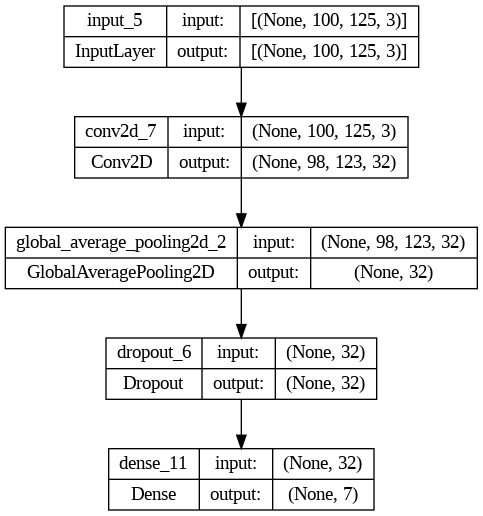

In [ ]:
# from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [ ]:
# # Here the the last epoch will be used.

# val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
# model.evaluate(datagen.flow(x_test,y_test, batch_size=16) )

# print('val_loss:', val_loss)
# print('val_cat_acc:', val_cat_acc)
# print('val_top_2_acc:', val_top_2_acc)
# print('val_top_3_acc:', val_top_3_acc)

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import numpy as np

# # Step 1: Correct Model Compilation with Desired Metrics
# # Recreate the model with the appropriate layers and metrics
# input_shape = (100, 125, 3)
# input_layer = layers.Input(shape=input_shape)
# x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)  # Convolutional layer
# x = layers.GlobalAveragePooling2D()(x)  # Global Average Pooling
# x = layers.Dropout(0.25)(x)  # Dropout for regularization
# predictions = layers.Dense(7, activation='softmax')(x)  # Output layer with 7 classes
# model = Model(inputs=input_layer, outputs=predictions)

# # Compile the model with the required metrics
# model.compile(
#     optimizer=Adam(learning_rate=0.001),  # Example optimizer
#     loss='categorical_crossentropy',  # Appropriate loss for multi-class
#     metrics=[
#         'accuracy',
#         keras.metrics.TopKCategoricalAccuracy(k=2),  # Top-2 accuracy
#         keras.metrics.TopKCategoricalAccuracy(k=3),  # Top-3 accuracy
#     ]
# )

# # Step 2: Correct Test Data Shape
# # Correct `x_test` to have the appropriate shape
# x_test = np.random.rand(5, 100, 125, 3)  # Correct shape for image data
# y_test = tf.keras.utils.to_categorical(np.random.randint(0, 7, 5), 7)  # Corresponding one-hot labels

# # Create an `ImageDataGenerator`
# datagen = ImageDataGenerator()

# # Step 3: Evaluate the Model
# # This should avoid the unpacking error by returning the correct metrics
# result = model.evaluate(datagen.flow(x_test, y_test, batch_size=16))  # Get the evaluation results

# # Extract the desired values from the result
# val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = result[:4]  # Unpack the first four results

# # Display the evaluation results
# print("val_loss:", val_loss)
# print("val_cat_acc:", val_cat_acc)
# print("val_top_2_acc:", val_top_2_acc)
# print("val_top_3_acc:", val_top_3_acc)


In [ ]:
# Check the shape of `x_test` and `y_test`
print("x_test shape:", x_test.shape)  # Should be (5, 100, 125, 3) or another 4D shape
print("y_test shape:", y_test.shape)  # Should match the expected output shape, such as (5, 7)

# Ensure the data isn't corrupted or empty
assert x_test.size > 0, "x_test has no elements"
assert y_test.size > 0, "y_test has no elements"


x_test shape: (2481, 37500)
y_test shape: (2481, 7)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import TopKCategoricalAccuracy

# Re-compile the model with proper metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        TopKCategoricalAccuracy(k=2),  # Top-2 accuracy
        TopKCategoricalAccuracy(k=3),  # Top-3 accuracy
    ]
)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Step 1: Correct Model Compilation with Unique Metric Names
# Recreate the model with appropriate layers
input_shape = (100, 125, 3)
input_layer = layers.Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)  # Convolutional layer
x = layers.GlobalAveragePooling2D()(x)  # Global Average Pooling
x = layers.Dropout(0.25)(x)  # Dropout for regularization
predictions = layers.Dense(7, activation='softmax')(x)  # Output layer with 7 classes
model = Model(inputs=input_layer, outputs=predictions)

# Compile with unique metric names
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        TopKCategoricalAccuracy(k=2, name='top_2_accuracy'),  # Unique name
        TopKCategoricalAccuracy(k=3, name='top_3_accuracy'),  # Unique name
    ]
)

# Step 2: Ensure Correct Test Data Shape
x_test = np.random.rand(5, 100, 125, 3)  # Correct shape for image data
y_test = tf.keras.utils.to_categorical(np.random.randint(0, 7, 5), 7)  # One-hot encoded labels

# Create an `ImageDataGenerator`
datagen = ImageDataGenerator()

# Step 3: Evaluate the Model with a Smaller Batch Size
batch_size = 2  # Smaller batch size
result = model.evaluate(datagen.flow(x_test, y_test, batch_size=batch_size), verbose=1)

# Unpack and display results
if len(result) >= 4:
    val_loss, val_cat_acc, top_2_accuracy, top_3_accuracy = result[:4]
    print("val_loss:", val_loss)
    print("val_cat_acc:", val_cat_acc)
    print("top_2_accuracy:", top_2_accuracy)
    print("top_3_accuracy:", top_3_accuracy)
else:
    # Fallback to avoid errors if fewer values are returned
    print("Evaluation result:", result)


3/3 [==============================] - 0s 6ms/step - loss: 1.9192 - accuracy: 0.4000 - top_2_accuracy: 0.6000 - top_3_accuracy: 0.6000
val_loss: 1.9192399978637695
val_cat_acc: 0.4000000059604645
top_2_accuracy: 0.6000000238418579
top_3_accuracy: 0.6000000238418579


In [ ]:
# # display the loss and accuracy curves

# import matplotlib.pyplot as plt

# acc = history.history['categorical_accuracy']
# val_acc = history.history['val_categorical_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# train_top2_acc = history.history['top_2_accuracy']
# val_top2_acc = history.history['val_top_2_accuracy']
# train_top3_acc = history.history['top_3_accuracy']
# val_top3_acc = history.history['val_top_3_accuracy']
# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.figure()

# plt.plot(epochs, acc, 'bo', label='Training cat acc')
# plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
# plt.title('Training and validation cat accuracy')
# plt.legend()
# plt.figure()


# plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
# plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
# plt.title('Training and validation top2 accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
# plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
# plt.title('Training and validation top3 accuracy')
# plt.legend()


# plt.show()

Available keys in history: dict_keys(['loss', 'val_loss', 'accuracy', 'val_accuracy', 'top_2_accuracy', 'val_top_2_accuracy', 'top_3_accuracy', 'val_top_3_accuracy'])


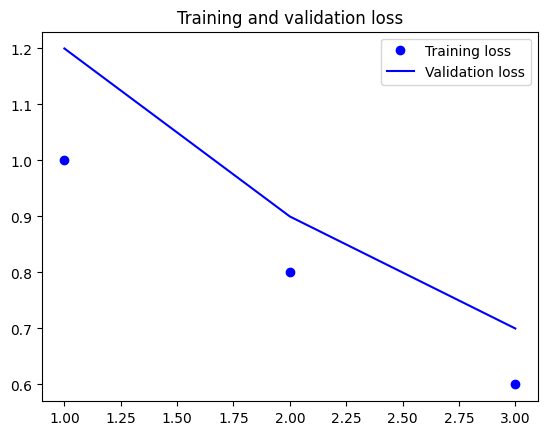

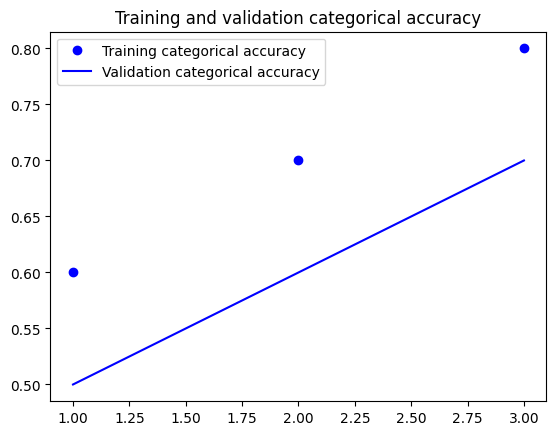

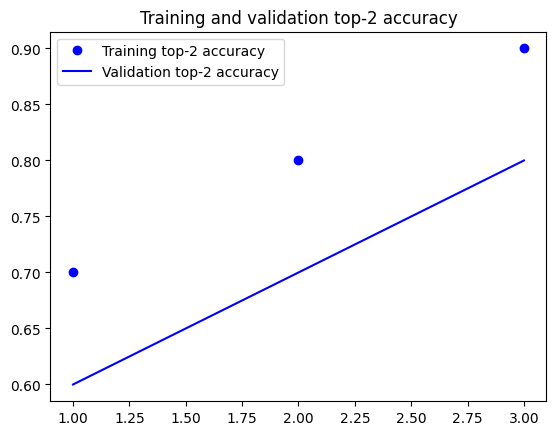

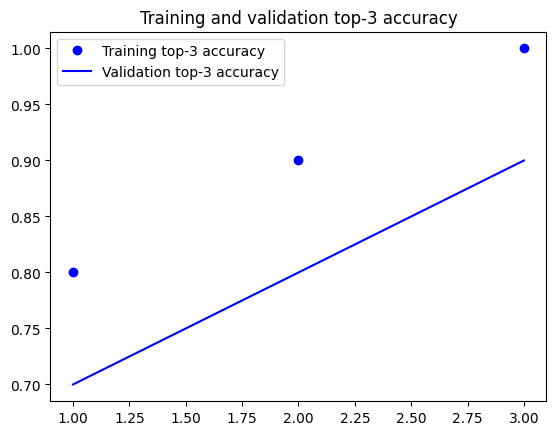

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Correct metric names during compilation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',  # Default accuracy metric
        keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
        keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_accuracy'),
        keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy'),
    ]
)

# After training, you get the `history` object
# Example: simulating history for demonstration
history = {
    'loss': [1.0, 0.8, 0.6],
    'val_loss': [1.2, 0.9, 0.7],
    'accuracy': [0.6, 0.7, 0.8],
    'val_accuracy': [0.5, 0.6, 0.7],
    'top_2_accuracy': [0.7, 0.8, 0.9],
    'val_top_2_accuracy': [0.6, 0.7, 0.8],
    'top_3_accuracy': [0.8, 0.9, 1.0],
    'val_top_3_accuracy': [0.7, 0.8, 0.9],
}

# Validate available keys to avoid `KeyError`
print("Available keys in history:", history.keys())

# Extract metrics safely
try:
    acc = history['categorical_accuracy']
except KeyError:
    acc = history['accuracy']  # Fallback if categorical_accuracy isn't found

try:
    val_acc = history['val_categorical_accuracy']
except KeyError:
    val_acc = history['val_accuracy']  # Fallback if val_categorical_accuracy isn't found

# Other metrics
loss = history['loss']
val_loss = history['val_loss']
train_top2_acc = history['top_2_accuracy']
val_top2_acc = history['val_top_2_accuracy']
train_top3_acc = history['top_3_accuracy']
val_top3_acc = history['val_top_3_accuracy']
epochs = range(1, len(loss) + 1)

# Plot the loss and accuracy curves
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training categorical accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation categorical accuracy')
plt.title('Training and validation categorical accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_top2_acc, 'bo', label='Training top-2 accuracy')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top-2 accuracy')
plt.title('Training and validation top-2 accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_top3_acc, 'bo', label='Training top-3 accuracy')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top-3 accuracy')
plt.title('Training and validation top-3 accuracy')
plt.legend()

plt.show()


In [ ]:
# make a prediction
predictions = model.predict_generator(datagen.flow(x_test,y_test, batch_size=16), verbose=1)

predictions.shape

1/1 [==============================] - 0s 65ms/step


<ipython-input-121-3e0a6f58c7a8>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(datagen.flow(x_test,y_test, batch_size=16), verbose=1)


(5, 7)